In [1]:
from ska_ost_array_config.array_config import LowSubArray, filter_array_by_distance
from ska_ost_array_config.simulation_utils import ExternalTelescope
from ska_ost_array_config.simulation_utils import simulate_observation
from ska_ost_array_config.UVW import UVW, plot_baseline_distribution
from utils import describe_subarray
import numpy as np
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy import units
import matplotlib.pyplot as plt

# Define simulation parameters
start_freq = 50e6
chan_width = 3e6
n_chan = 100
integ_time = 10
duration = 3600.

In [2]:
low_aastar = LowSubArray(subarray_type="AA*")
low_aastar_1km_list = filter_array_by_distance(
        low_aastar, distance=1000.
)

low_aa4 = LowSubArray(subarray_type="AA4")
low_aa4_1km_list = filter_array_by_distance(
        low_aa4, distance=1000.
)

In [3]:
ref_time = Time.now()
zenith = SkyCoord(
    alt=90 * units.deg, az=0 * units.deg, frame="altaz",
    obstime=ref_time, location=low_aastar.array_config.location,
).icrs

In [4]:
def metre_to_deg(distance_m):
    """
    Convert physical distance on the surface of the earth in metre 
    to angular distance in degrees assuming small-angle approximation.
    """
    r_earth = 6378100 # [m]
    return (distance_m * 360.) / (2*np.pi*r_earth)

In [5]:
# Read in the LOW coordinates
import pandas
import os
from astropy.coordinates import EarthLocation
low_coord_file = os.path.abspath('') + "/../src/ska_ost_array_config/static/low_array_coords.dat"
full_array_data = pandas.read_table(
    low_coord_file,
    sep=",",
    comment="#",
    names=["Station ID", "Label", "Longitude", "Latitude"],
)

## LOW_substation_18m_r1km_AAstar

In [6]:
substations = []
for station in low_aastar_1km_list.split(","):
    idx = full_array_data.index[full_array_data["Label"] == station]

    substations.append(
        ExternalTelescope(
            label=f"{station}_1",
            location=EarthLocation.from_geodetic(
                lon = float(full_array_data.iloc[idx]["Longitude"]) + metre_to_deg(9.), 
                lat = float(full_array_data.iloc[idx]["Latitude"]) + metre_to_deg(9.), 
                height=0.0, 
                ellipsoid="WGS84"
            ),
            station_diameter=18.
        )
    )
    substations.append(
        ExternalTelescope(
            label=f"{station}_2",
            location=EarthLocation.from_geodetic(
                lon = float(full_array_data.iloc[idx]["Longitude"]) - metre_to_deg(9.), 
                lat = float(full_array_data.iloc[idx]["Latitude"]) + metre_to_deg(9.), 
                height=0.0, 
                ellipsoid="WGS84"
            ),
            station_diameter=18.
        )
    )
    substations.append(
        ExternalTelescope(
            label=f"{station}_3",
            location=EarthLocation.from_geodetic(
                lon = float(full_array_data.iloc[idx]["Longitude"]) + metre_to_deg(9.), 
                lat = float(full_array_data.iloc[idx]["Latitude"]) - metre_to_deg(9.), 
                height=0.0, 
                ellipsoid="WGS84"
            ),
            station_diameter=18.
        )
    )
    substations.append(
        ExternalTelescope(
            label=f"{station}_4",
            location=EarthLocation.from_geodetic(
                lon = float(full_array_data.iloc[idx]["Longitude"]) - metre_to_deg(9.), 
                lat = float(full_array_data.iloc[idx]["Latitude"]) - metre_to_deg(9.), 
                height=0.0, 
                ellipsoid="WGS84"
            ),
            station_diameter=18.
        )
    )


substation_array = LowSubArray(
    subarray_type="custom", custom_stations="", external_telescopes=substations
)

/var/folders/hs/5316md193nxgxfqz_2pcqfv834mc4t/T/ipykernel_35131/2738609179.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lon = float(full_array_data.iloc[idx]["Longitude"]) + metre_to_deg(9.),
/var/folders/hs/5316md193nxgxfqz_2pcqfv834mc4t/T/ipykernel_35131/2738609179.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lat = float(full_array_data.iloc[idx]["Latitude"]) + metre_to_deg(9.),
/var/folders/hs/5316md193nxgxfqz_2pcqfv834mc4t/T/ipykernel_35131/2738609179.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lon = float(full_array_data.iloc[idx]["Longitude"]) - metre_to_deg(9.),
/var/folders/hs/5316md193nxgxfqz_2pcqfv834mc4t/T/ipykernel_35131/2738609179.py:22: FutureWarning: Call

In [7]:
describe_subarray(
    substation_array,
    ref_freq=start_freq,
    chan_width=chan_width,
    n_chan=n_chan,
    integ_time=integ_time,
    n_bins=20,
    title="LOW_substation_18m_r1km_AAstar subarray",
    output_file="low_substation_18m_r1km_AAstar.png"
)

/Users/s.sridhar/Library/Caches/pypoetry/virtualenvs/ska-ost-array-config-ffAgvIi0-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/s.sridhar/Library/Caches/pypoetry/virtualenvs/ska-ost-array-config-ffAgvIi0-py3.10/lib/python3.10/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coor

In [8]:
low_aastar_1km = LowSubArray(subarray_type="custom", custom_stations=low_aastar_1km_list)
print(",".join(low_aastar_1km.array_config.names.data.tolist()))

C1,C10,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C11,C110,C111,C112,C113,C114,C115,C117,C119,C12,C120,C121,C123,C124,C125,C126,C128,C129,C13,C130,C132,C133,C135,C137,C138,C139,C14,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C15,C150,C151,C153,C154,C155,C156,C158,C16,C160,C161,C162,C163,C164,C165,C166,C167,C168,C17,C170,C171,C172,C173,C175,C176,C177,C179,C18,C180,C181,C183,C184,C185,C186,C187,C19,C190,C191,C192,C193,C194,C195,C197,C198,C199,C2,C20,C200,C201,C202,C203,C204,C205,C206,C207,C208,C21,C212,C213,C214,C216,C217,C219,C22,C222,C223,C224,C23,C24,C25,C26,C27,C28,C29,C3,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C4,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C5,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C6,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C7,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C8,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C9,C90,C91,C92,C93,C95,C96,C97,C98,C99


In [9]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(8,4))

vis = simulate_observation(
    array_config=low_aastar_1km.array_config, phase_centre=zenith,
    start_time=ref_time, ref_freq=start_freq,
    chan_width=chan_width, n_chan=1,
    integration_time=1, duration=1,
)
uvw = UVW(vis, ignore_autocorr=True)
print(np.min(uvw.uvdist_m), np.max(uvw.uvdist_m))
plot_baseline_distribution(
    uvw, method="lambda", bins=100, axes=axes, scale="", cumulative=False, label="w/o substations"
)
del vis, uvw

vis = simulate_observation(
    array_config=substation_array.array_config, phase_centre=zenith,
    start_time=ref_time, ref_freq=start_freq,
    chan_width=chan_width, n_chan=1,
    integration_time=1, duration=1,
)
uvw = UVW(vis, ignore_autocorr=True)
print(np.min(uvw.uvdist_m), np.max(uvw.uvdist_m))
plot_baseline_distribution(
    uvw, method="lambda", bins=100, axes=axes, scale="", cumulative=False, label="with substations"
)
del vis, uvw

axes.legend()
axes.set_ylabel("Fraction of baselines")

plt.savefig("low_substation_18m_r1km_AAstar_compare.png")

/Users/s.sridhar/Library/Caches/pypoetry/virtualenvs/ska-ost-array-config-ffAgvIi0-py3.10/lib/python3.10/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


41.03846887080337 1014.3901215783001


/Users/s.sridhar/Library/Caches/pypoetry/virtualenvs/ska-ost-array-config-ffAgvIi0-py3.10/lib/python3.10/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


16.07335662377053 1032.7262111679843


In [10]:
import pickle
with open("LOW_SUBSTATION_18M_R1KM_AASTAR.picklejar", "wb") as file_obj:
    pickle.dump(substation_array, file_obj)

## LOW_substation_18m_r1km_AA4

In [11]:
substations = []
for station in low_aa4_1km_list.split(","):
    idx = full_array_data.index[full_array_data["Label"] == station]
    
    substations.append(
        ExternalTelescope(
            label=f"{station}_1",
            location=EarthLocation.from_geodetic(
                lon = float(full_array_data.iloc[idx]["Longitude"]) + metre_to_deg(9.), 
                lat = float(full_array_data.iloc[idx]["Latitude"]) + metre_to_deg(9.), 
                height=0.0, 
                ellipsoid="WGS84"
            ),
            station_diameter=18.
        )
    )
    substations.append(
        ExternalTelescope(
            label=f"{station}_2",
            location=EarthLocation.from_geodetic(
                lon = float(full_array_data.iloc[idx]["Longitude"]) - metre_to_deg(9.), 
                lat = float(full_array_data.iloc[idx]["Latitude"]) + metre_to_deg(9.), 
                height=0.0, 
                ellipsoid="WGS84"
            ),
            station_diameter=18.
        )
    )
    substations.append(
        ExternalTelescope(
            label=f"{station}_3",
            location=EarthLocation.from_geodetic(
                lon = float(full_array_data.iloc[idx]["Longitude"]) + metre_to_deg(9.), 
                lat = float(full_array_data.iloc[idx]["Latitude"]) - metre_to_deg(9.), 
                height=0.0, 
                ellipsoid="WGS84"
            ),
            station_diameter=18.
        )
    )
    substations.append(
        ExternalTelescope(
            label=f"{station}_4",
            location=EarthLocation.from_geodetic(
                lon = float(full_array_data.iloc[idx]["Longitude"]) - metre_to_deg(9.), 
                lat = float(full_array_data.iloc[idx]["Latitude"]) - metre_to_deg(9.), 
                height=0.0, 
                ellipsoid="WGS84"
            ),
            station_diameter=18.
        )
    )

substation_array = LowSubArray(
    subarray_type="custom", custom_stations="", external_telescopes=substations
)

/var/folders/hs/5316md193nxgxfqz_2pcqfv834mc4t/T/ipykernel_35131/2469795254.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lon = float(full_array_data.iloc[idx]["Longitude"]) + metre_to_deg(9.),
/var/folders/hs/5316md193nxgxfqz_2pcqfv834mc4t/T/ipykernel_35131/2469795254.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lat = float(full_array_data.iloc[idx]["Latitude"]) + metre_to_deg(9.),
/var/folders/hs/5316md193nxgxfqz_2pcqfv834mc4t/T/ipykernel_35131/2469795254.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lon = float(full_array_data.iloc[idx]["Longitude"]) - metre_to_deg(9.),
/var/folders/hs/5316md193nxgxfqz_2pcqfv834mc4t/T/ipykernel_35131/2469795254.py:22: FutureWarning: Call

In [12]:
describe_subarray(
    substation_array,
    ref_freq=start_freq,
    chan_width=chan_width,
    n_chan=n_chan,
    integ_time=integ_time,
    n_bins=20,
    title="LOW_substation_18m_r1km_AA4 subarray",
    output_file="low_substation_18m_r1km_AA4.png"
)

/Users/s.sridhar/Library/Caches/pypoetry/virtualenvs/ska-ost-array-config-ffAgvIi0-py3.10/lib/python3.10/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)
/Users/s.sridhar/Library/Caches/pypoetry/virtualenvs/ska-ost-array-config-ffAgvIi0-py3.10/lib/python3.10/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning:

In [13]:
low_aa4_1km = LowSubArray(subarray_type="custom", custom_stations=low_aa4_1km_list)
print(",".join(low_aa4_1km.array_config.names.data.tolist()))

C1,C10,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C11,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C12,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C13,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C14,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C15,C150,C151,C152,C153,C154,C155,C156,C157,C158,C159,C16,C160,C161,C162,C163,C164,C165,C166,C167,C168,C169,C17,C170,C171,C172,C173,C174,C175,C176,C177,C178,C179,C18,C180,C181,C182,C183,C184,C185,C186,C187,C188,C189,C19,C190,C191,C192,C193,C194,C195,C196,C197,C198,C199,C2,C20,C200,C201,C202,C203,C204,C205,C206,C207,C208,C209,C21,C210,C211,C212,C213,C214,C215,C216,C217,C218,C219,C22,C220,C221,C222,C223,C224,C23,C24,C25,C26,C27,C28,C29,C3,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C4,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C5,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C6,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C7,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C8,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C9,C90,C91,C92,C93,C94,C95,C96,

/Users/s.sridhar/Library/Caches/pypoetry/virtualenvs/ska-ost-array-config-ffAgvIi0-py3.10/lib/python3.10/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


41.03846887080337 1726.249782569544


/Users/s.sridhar/Library/Caches/pypoetry/virtualenvs/ska-ost-array-config-ffAgvIi0-py3.10/lib/python3.10/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


16.072734158730018 1750.080019571665


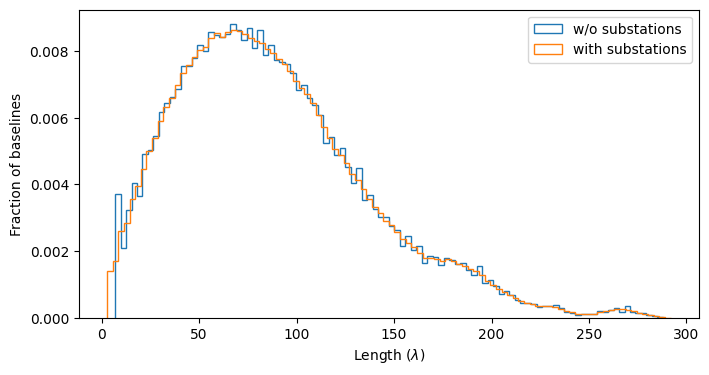

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(8,4))

vis = simulate_observation(
    array_config=low_aa4_1km.array_config, phase_centre=zenith,
    start_time=ref_time, ref_freq=start_freq,
    chan_width=chan_width, n_chan=1,
    integration_time=1, duration=1,
)
uvw = UVW(vis, ignore_autocorr=True)
print(np.min(uvw.uvdist_m), np.max(uvw.uvdist_m))
plot_baseline_distribution(
    uvw, method="lambda", bins=100, axes=axes, scale="", cumulative=False, label="w/o substations"
)
del vis, uvw

vis = simulate_observation(
    array_config=substation_array.array_config, phase_centre=zenith,
    start_time=ref_time, ref_freq=start_freq,
    chan_width=chan_width, n_chan=1,
    integration_time=1, duration=1,
)
uvw = UVW(vis, ignore_autocorr=True)
print(np.min(uvw.uvdist_m), np.max(uvw.uvdist_m))
plot_baseline_distribution(
    uvw, method="lambda", bins=100, axes=axes, scale="", cumulative=False, label="with substations"
)
del vis, uvw

axes.legend()
axes.set_ylabel("Fraction of baselines")

plt.savefig("low_substation_18m_r1km_AA4_compare.png")

In [15]:
import pickle
with open("LOW_SUBSTATION_18M_R1KM_AA4.picklejar", "wb") as file_obj:
    pickle.dump(substation_array, file_obj)